## Importing the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings 
warnings.filterwarnings("ignore")

## Importing The Data

In [4]:
df = pd.read_csv("Iris.csv")

## Visualising the head Values

In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking if the dataset has null values or not

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Dataset has no Null Values

### Checking out the shape of dataset

In [6]:
df.shape

(150, 6)

### Finding out the features of datset

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## EDA

### Visualising the target variable

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

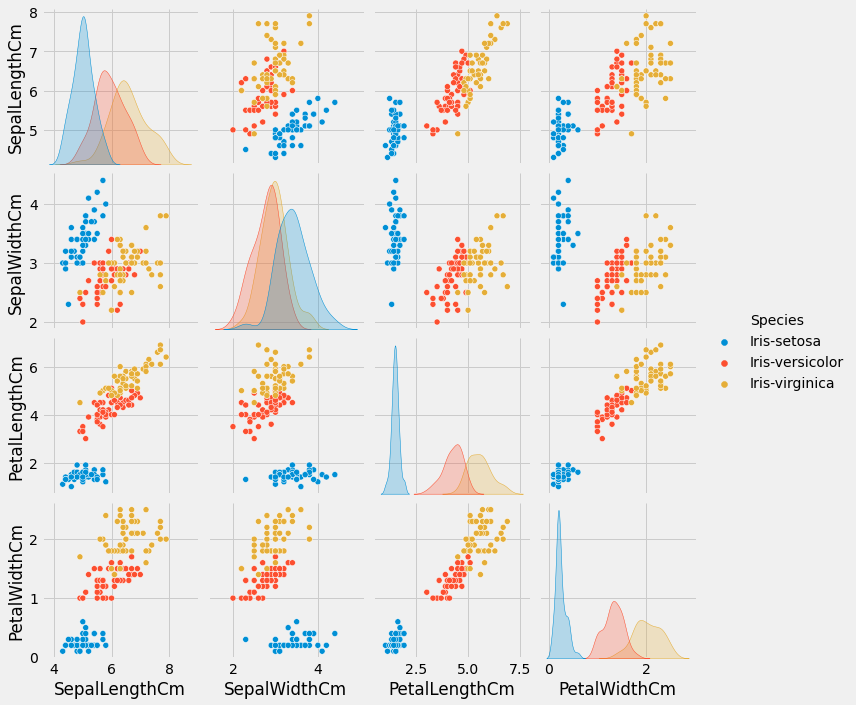

In [10]:
sns.pairplot(vars=["SepalLengthCm" ,"SepalWidthCm","PetalLengthCm","PetalWidthCm"],data=df,hue="Species")

Text(0.5, 1.0, 'Countplot of Species')

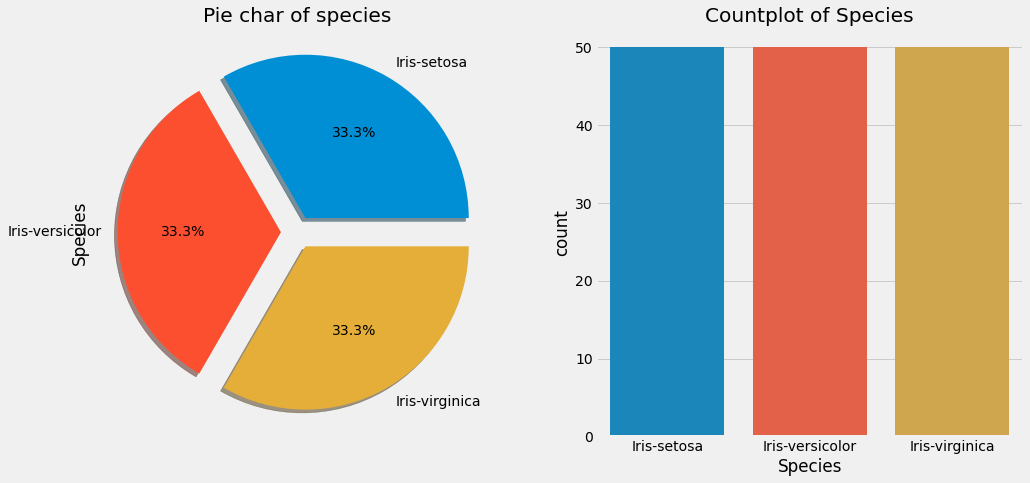

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

df['Species'].value_counts().plot.pie(explode = [0.1,0.1,0.1], autopct="%1.1f%%",ax=ax[0], shadow=True)
ax[0].set_title("Pie char of species")

sns.countplot(df['Species'],ax=ax[1])
ax[1].set_title("Countplot of Species")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

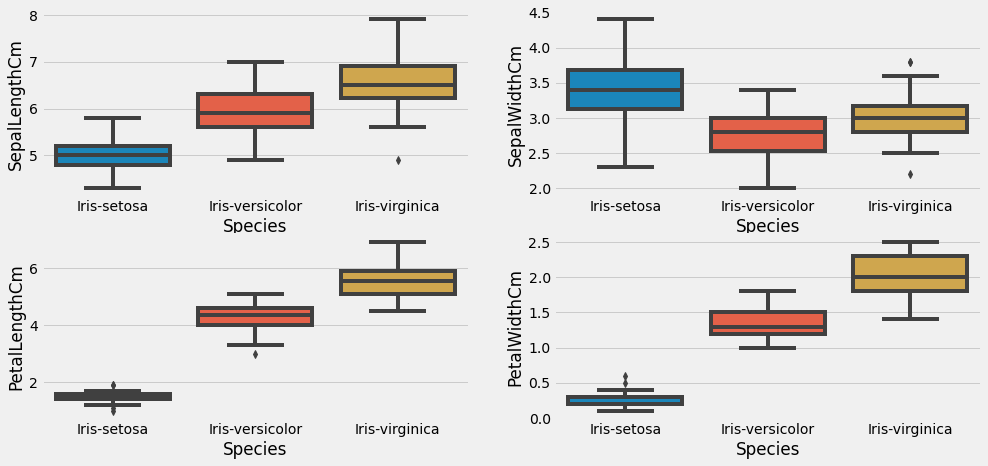

In [11]:
fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(15,7))

sns.boxplot(df['Species'],df['SepalLengthCm'],ax=ax[0,0])
sns.boxplot(df['Species'],df['SepalWidthCm'],ax=ax[0,1])
sns.boxplot(df['Species'],df['PetalLengthCm'],ax=ax[1,0])
sns.boxplot(df['Species'],df['PetalWidthCm'],ax=ax[1,1])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

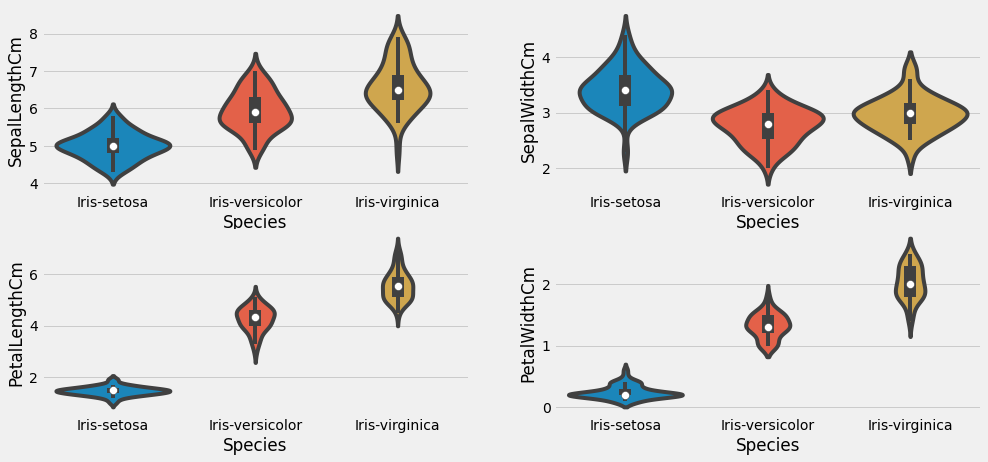

In [12]:
fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(15,7))

sns.violinplot(df['Species'],df['SepalLengthCm'],ax=ax[0,0])
sns.violinplot(df['Species'],df['SepalWidthCm'],ax=ax[0,1])
sns.violinplot(df['Species'],df['PetalLengthCm'],ax=ax[1,0])
sns.violinplot(df['Species'],df['PetalWidthCm'],ax=ax[1,1])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

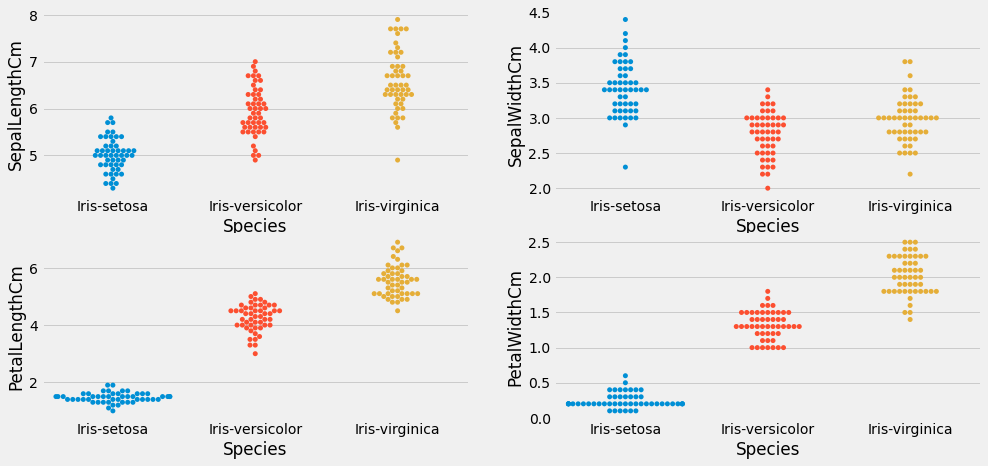

In [13]:
fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(15,7))

sns.swarmplot(df['Species'],df['SepalLengthCm'],ax=ax[0,0])
sns.swarmplot(df['Species'],df['SepalWidthCm'],ax=ax[0,1])
sns.swarmplot(df['Species'],df['PetalLengthCm'],ax=ax[1,0])
sns.swarmplot(df['Species'],df['PetalWidthCm'],ax=ax[1,1])

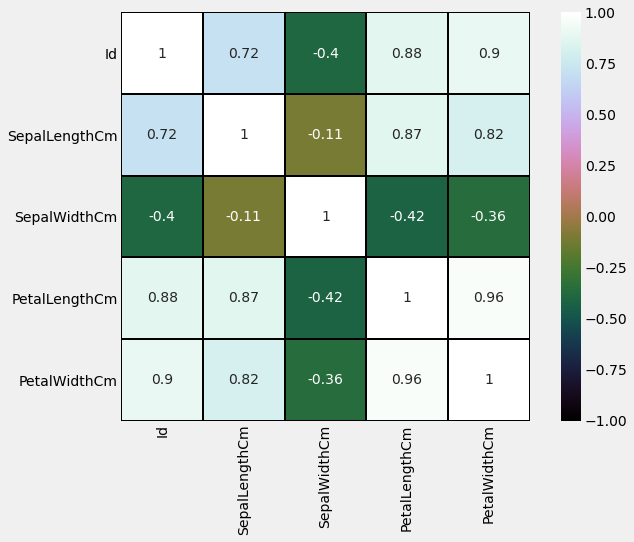

In [14]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

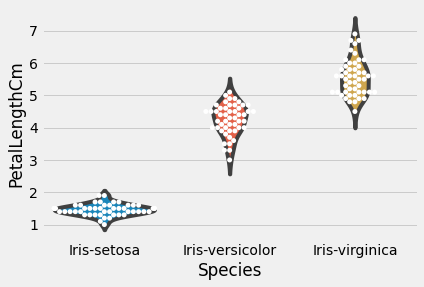

In [19]:
ax = sns.violinplot(x="Species", y="PetalLengthCm", data=df, inner=None)
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=df,color="white", edgecolor="black")

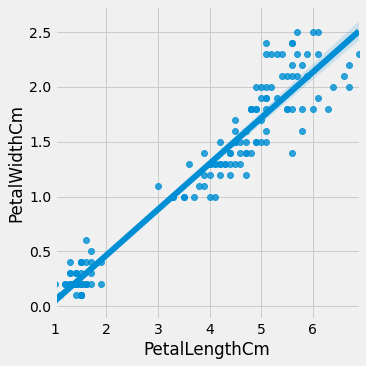

In [20]:
fig=sns.lmplot(x="PetalLengthCm", y="PetalWidthCm",data=df,)

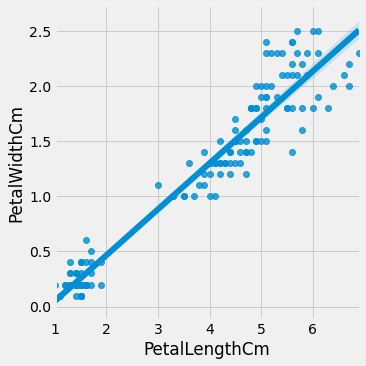

In [21]:
fig=sns.lmplot(x="PetalLengthCm", y="PetalWidthCm",data=df,)

In [24]:
x = df.drop(['Id', 'Species'],axis=1)

## Finding the optimum number of clusters for k-means classification


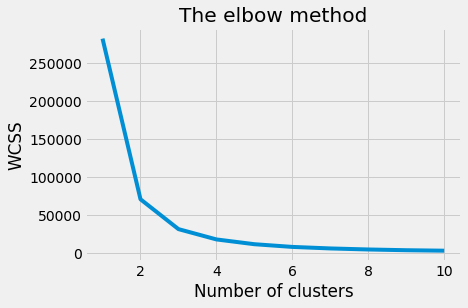

In [33]:

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


### Plotting the results onto a line graph, 
### allowing us to observe 'The elbow'


In [ ]:
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Making the Kmeans Model

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Predicting the values and visualising on the graph

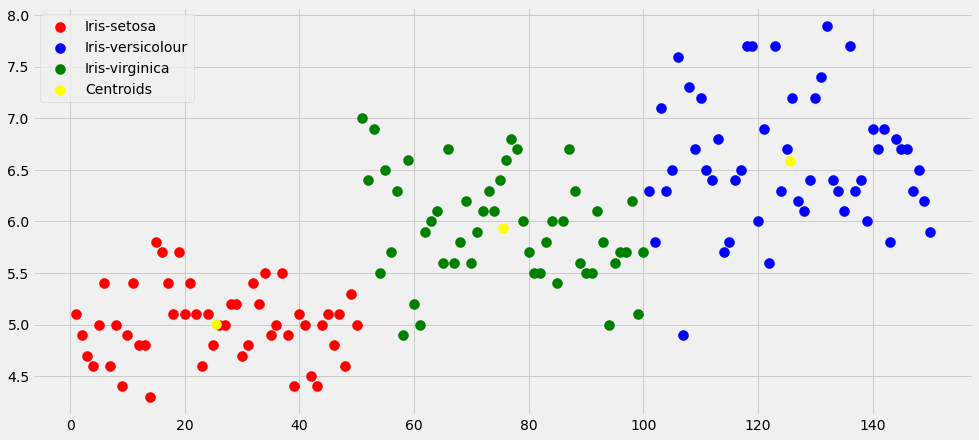

In [36]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(15,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()